Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [305]:
import numpy as np
import pandas as pd
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df=pd.DataFrame(data=data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [307]:
df.info()  #displays basic summary
df.describe()  #displays statistical summary

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [309]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [311]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [313]:
df[['animal','age']].iloc[[2,3,7]] #inorder to display rows 3,4 and 8, arguments in iloc given as rownumber-1

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [315]:
df[df.visits>=3] #since no rows are having number of visits>3, rows with visits>=3 are displayed

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [317]:
df.loc[df['age'].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [319]:
df[(df.age<3.0) & (df.animal=='cat')]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [321]:
df[(df.age>=2.0) & (df.age<=4.0)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [323]:
df['age'].loc['f']=1.5
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_2180\1833857733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].loc['f']=1.5


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [325]:
df['visits'].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [327]:
df.groupby(['animal']).agg({'age':['mean']}) #note this mean is calculated with age in row f changed to 1.5 as per question 10

,age
,mean
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [329]:
df.loc['k']=['cow',6.0,2,'yes']
print("data frame with new row 'k' appended is: \n" , df)
df.drop('k',inplace=True)
print("\ndata frame with new row 'k' deleted is: \n" , df)

data frame with new row 'k' appended is: 
   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k    cow  6.0       2      yes

data frame with new row 'k' deleted is: 
   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**14.** Count the number of each type of animal in `df`.

In [335]:
df.groupby(['animal']).agg({'animal':['count']})

,animal
,count
animal,
cat,4
dog,4
snake,2


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [337]:
df.sort_values(by=['age','visits'],axis=0,ascending=[False,True],inplace=True)
df

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [339]:
df['priority'].replace({'yes': True, 'no': False}, inplace = True)
df

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,snake,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,1.5,3,False
c,snake,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [341]:
df['animal'].replace({'snake': 'python'}, inplace = True)
df

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,python,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,1.5,3,False
c,python,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


**18.** Load the ny-flights dataset to Python

In [343]:
import pandas as pd
flight=pd.read_csv('C:/Users/Dell/Desktop/vishnu/ICT_assignments/ny-flights (2).csv')
flight

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [345]:
x=flight['airline_id'].mode()
print ("airline ID which is present maximum times in the dataset is: ",x[0])

airline ID which is present maximum times in the dataset is:  20409


**20.** Draw a plot between dep_delay and arr_delay

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


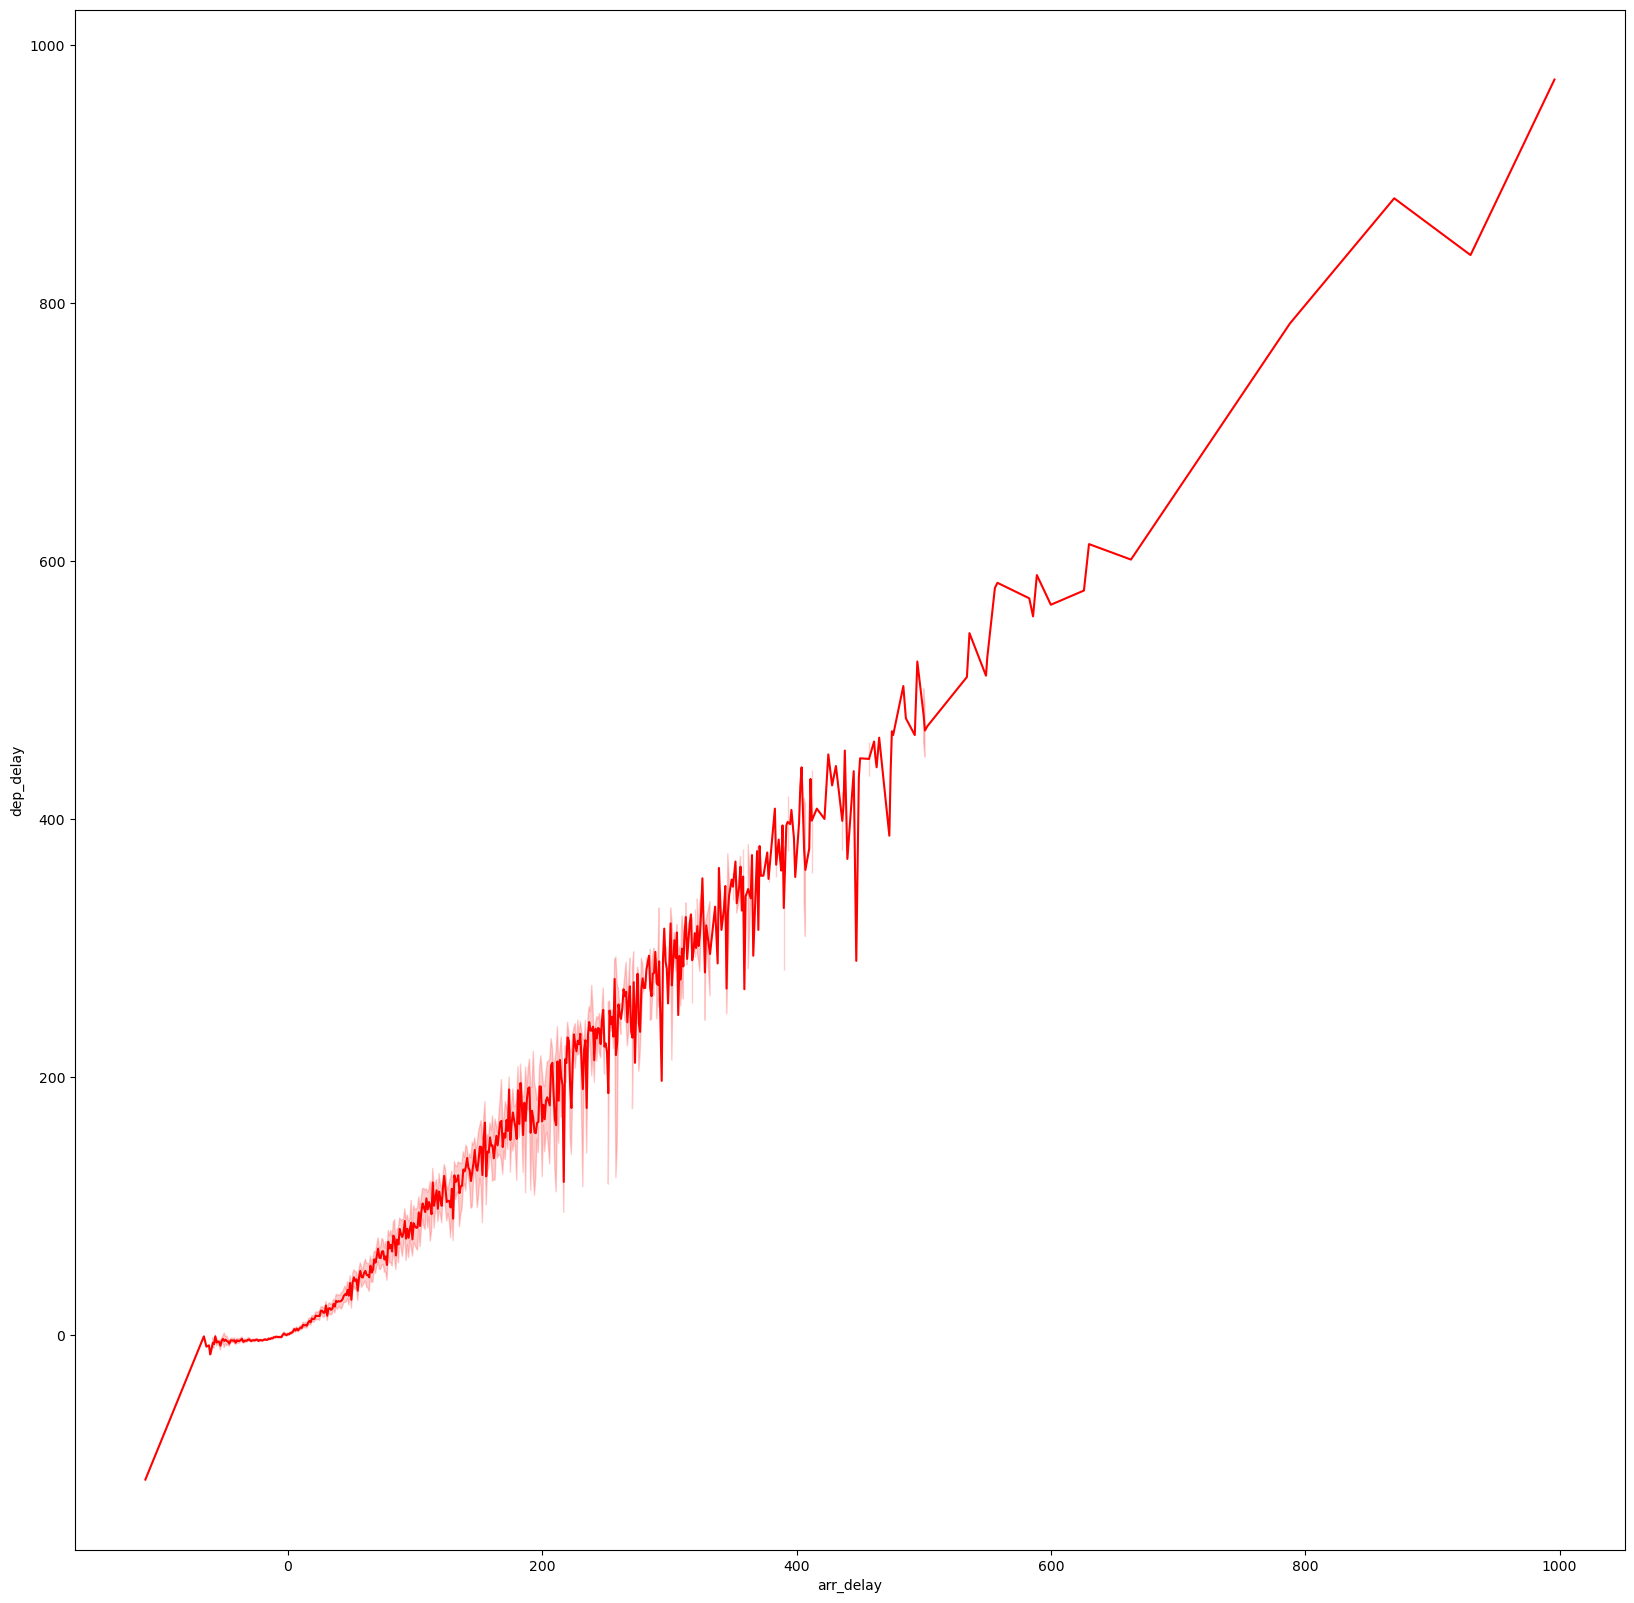

In [367]:
import seaborn as sns

fig=plt.figure(figsize=(20,20)) #to set the plot area of graph
sns.lineplot(data=flight,x='arr_delay',y='dep_delay',color='red');